<a href="https://colab.research.google.com/github/akpatel94/Zomato_Restaurant_Clustering_and_Sentiment_Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member  -** Amit Kumar Patel

# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

There are two separate files, while the columns are self explanatory. Below is a brief description:

Restaurant names and Metadata - This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Restaurant reviews - Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

Steps to be Performed:-
1. Importing libraries
2. Loading the dataset
3. Shape of dataset
4. Dataset information
5. Handling the duplicate values
6. Handling missing values.
7. Undeerstanding the columns
8. Variable description
9. Data wrangling
10. Data visualization
11. Story telling and experimenting with charts.
12. Text preprocessing,
13. Latent Direchlet Allocation
14. Sentiment analysis
15. Challenges faced
16. Conclusion.

# **GitHub Link -**

https://github.com/akpatel94/Zomato_Restaurant_Clustering_and_Sentiment_Analysis/tree/main

# **Problem Statement**


The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import gensim

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing datasets.
zomato_reviews =pd.read_csv("/content/drive/MyDrive/data/Zomato Restaurant reviews.csv")
zomato_meta_data = pd.read_csv("/content/drive/MyDrive/data/Zomato Restaurant names and Metadata.csv")

### Dataset First View

In [ ]:
# Dataset First Look for zomato meta data
pd.concat([zomato_meta_data.head(3),zomato_meta_data.tail(3)])

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [ ]:
# dataset first view for zomato reviews dataset
pd.concat([zomato_reviews.head(3),zomato_reviews.tail(3)])

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
zomato_meta_data.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
zomato_reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info for zomato meta data
zomato_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# dataset info for zomato reviews
zomato_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count for zomato meta dataset
zomato_meta_data.duplicated().sum()

0

In [ ]:
# dataset duplicate value count for zomatao reviews
zomato_reviews.duplicated().sum()

36

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count for zomato meta data
zomato_meta_data.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# Missing Values/Null Values Count for zomato_reviews
zomato_reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

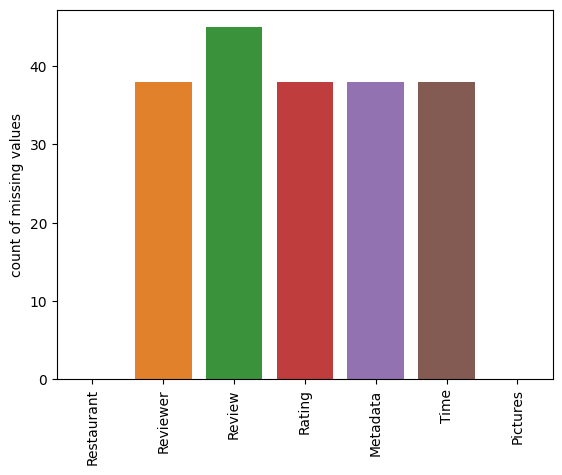

In [ ]:
# Visualizing the missing values
sns.barplot(x=zomato_reviews.columns, y=zomato_reviews.isnull().sum())
plt.xticks(rotation=90)
plt.ylabel("count of missing values")
plt.show()

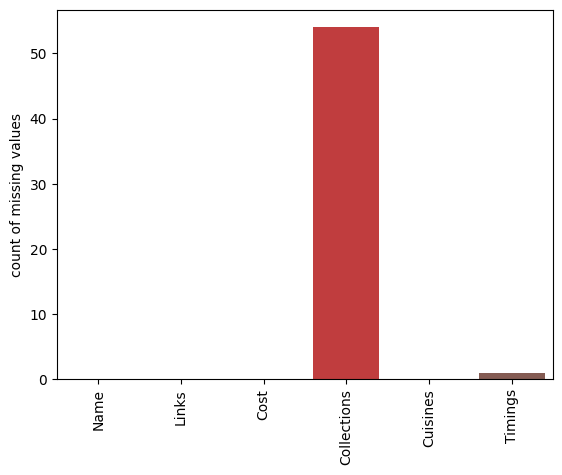

In [ ]:
# Visualizing the missing values
sns.barplot(x=zomato_meta_data.columns, y=zomato_meta_data.isnull().sum())
plt.xticks(rotation=90)
plt.ylabel("count of missing values")
plt.show()

### What did you know about your dataset?

There are two separate files, while the columns are self explanatory. Below is a brief description:

Restaurant names and Metadata - This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Restaurant reviews - Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
zomato_meta_data.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
# Dataset Columns
zomato_reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
zomato_meta_data.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
# Dataset Describe
zomato_reviews.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


# Variables Description

### Zomato Restaurant names and Metadata


1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

### Zomato Restaurant reviews

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable. for zomato_meta_data
def meta_data_info():
  variable_list = zomato_meta_data.columns.to_list()
  for i in variable_list:
    print(f'the unique values for {i} is : ',zomato_meta_data[i].unique())

meta_data_info()

the unique values for Name is :  ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom' 'Ulavacharu'

In [ ]:
# Check Unique Values for each variable for zomato reviews
def zomato_reviews_info():
  var_list = zomato_reviews.columns.to_list()
  for i in var_list:
    print(f'the unique values for {i} is : ',zomato_reviews[i].unique())

zomato_reviews_info()

the unique values for Restaurant is :  ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom' 'Ulava

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'.
zomato_meta_data['Cost'] = zomato_meta_data['Cost'].str.replace(",","").astype('int64')

In [ ]:
# Checking unique value for column cost reviews
zomato_meta_data['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

In [ ]:
# saperating the reviews count from the column metadata

zomato_reviews["Review_count"] = zomato_reviews["Metadata"].str.split(",").str[0]
zomato_reviews["Review_count"] = zomato_reviews["Review_count"].str.split(" ").str[0]

In [ ]:
# saperating the follower count from the column metadata

zomato_reviews['follower'] = zomato_reviews['Metadata'].str.split(',').str[1]
zomato_reviews['follower'] = zomato_reviews['follower'].str.split(' ').str[1]

In [ ]:
#  filling values 0 in place of na in follower columns
zomato_reviews['follower'] = zomato_reviews['follower'].fillna(0).astype('int')

In [ ]:
#  in Rating column replace like with median value
zomato_reviews['Rating'] = zomato_reviews['Rating'].replace('Like',zomato_reviews[zomato_reviews['Rating'] != 'Like'] ['Rating'].astype(float).median())

In [ ]:
#  changing to the datatypes of rating columns .
zomato_reviews['Rating'] = pd.to_numeric(zomato_reviews['Rating'],errors='coerce')

In [ ]:
#  change the datatypes object to float of columns review_count
zomato_reviews['Review_count'] = pd.to_numeric(zomato_reviews['Review_count'],errors='coerce')

In [ ]:
# Extracting year,month,hour from time column

zomato_reviews['Time'] = pd.to_datetime(zomato_reviews['Time'])
zomato_reviews['review_year'] = zomato_reviews['Time'].dt.year
zomato_reviews['review_month'] = zomato_reviews['Time'].dt.month
zomato_reviews['review_hour'] = zomato_reviews['Time'].dt.hour

In [ ]:
#  Looking head for zomato reviews column
zomato_reviews.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_count,follower,review_year,review_month,review_hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.0,2,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3.0,2,2019.0,5.0,14.0


### What all manipulations have you done and insights you found?

i have changed the datatypes of cost columns of dataset zomato_metadata.after that i have saperating the reviews count from the column metadata.
and i have saperated the follower count from the column metadata. and filling values 0 in place of na in follower columns of zomato reviewer dataset. i have changed in Ranting column replace like with median value. and changed the datatypes of rating columns and review_count columns. and finally in last i have Extracting year,month,hour from time column in reviewer dataset.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

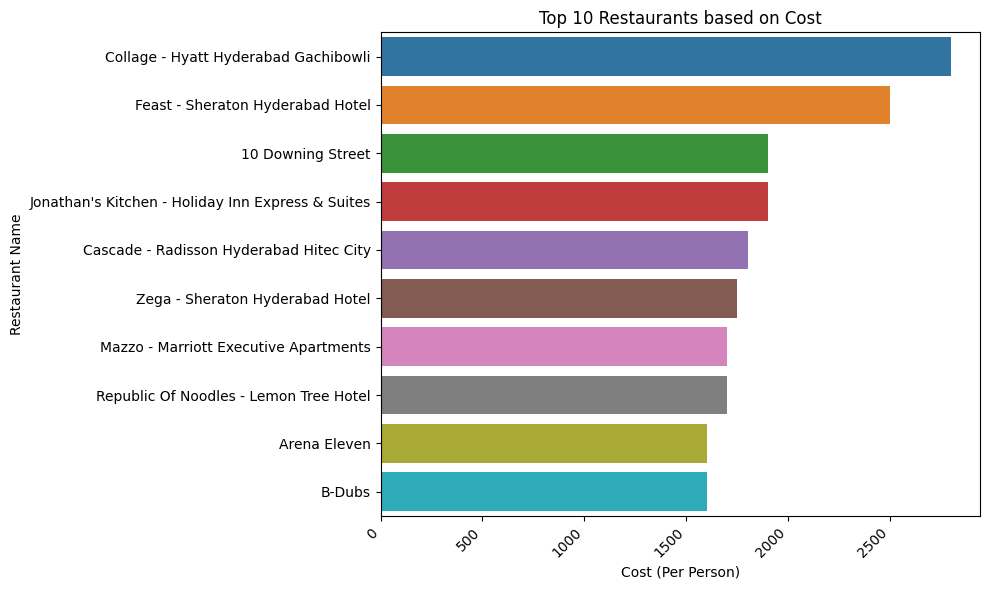

In [ ]:
# Chart - 1 visualization of Top10 Restaurants on cost columns
plt.figure(figsize=(10,6))
top10_restro=zomato_meta_data.groupby("Name")["Cost"].max().nlargest(10)
sns.barplot(y=top10_restro.index, x=top10_restro.values)
plt.ylabel('Restaurant Name')
plt.xlabel('Cost (Per Person)')
plt.title('Top 10 Restaurants based on Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are used to visualize and compare categorical data. They show the values of different categories as bars, making it easy to see differences and trends. They're simple, intuitive, and useful for frequency counts, comparisons, and distributions within groups. However, they might not be ideal for complex data or continuous variables.

##### 2. What is/are the insight(s) found from the chart?

we found top10 restaurent based on cost. and After analyzing the graph, it becomes evident that Hyatt Hyderabad Gachibowli, Sheraton Hyderabad Hotel, and 10 Downing Street are the top three costliest restaurants based on their per-person cost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we found the name of restaurent which have highest cost. it will helps us to know the servieces of the restaurent which provide by the restaurent decide the price range for the restaurent.

#### Chart - 2

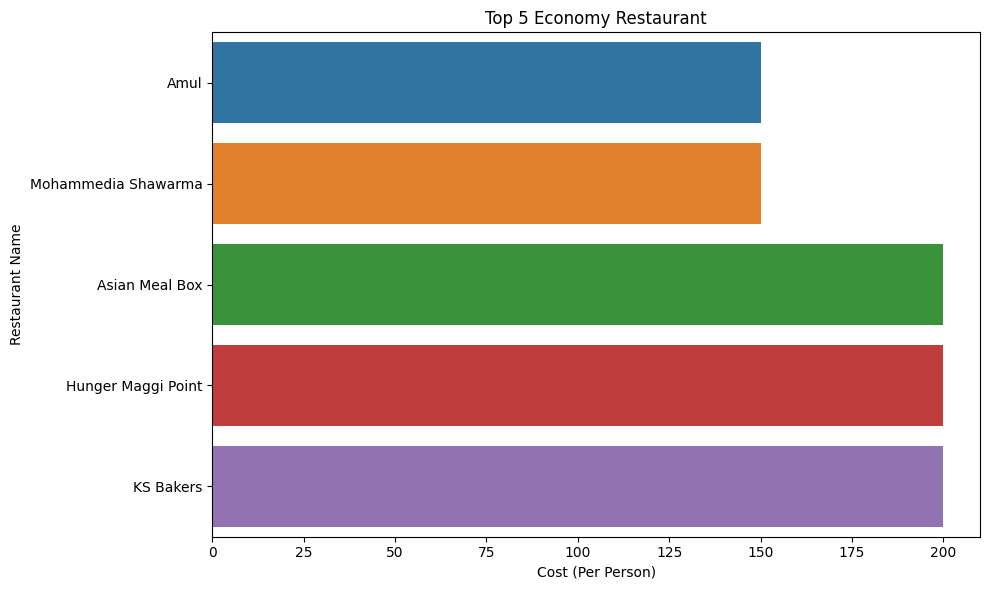

In [ ]:
# Chart - 2 visualization For top 5 economy Restaurants
plt.figure(figsize=(10, 6))
top5_economy_restro = zomato_meta_data.groupby("Name")["Cost"].min().nsmallest(5)
sns.barplot(x=top5_economy_restro.values, y=top5_economy_restro.index)
plt.xlabel('Cost (Per Person)')
plt.ylabel('Restaurant Name')
plt.title('Top 5 Economy Restaurant')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Using the bar plot visualization, I have investigated and identified the most budget-friendly restaurants, providing valuable insights into the economical culinary options available for diners.

##### 2. What is/are the insight(s) found from the chart?

Based on the data represented in the graph, it is evident that Amul, Mohammedia Shawarma, and Asian Meal Box are the most affordable restaurants, offering budget-friendly dining options to customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

it help us to know the most affordable restaurants, offering budget-friendly dining options to customers.
no, there are not any insights that leads to negative growth.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
# Split the cuisines and store them in a list
cuisine_list = zomato_meta_data['Cuisines'].str.split(', ').explode()
cuisine_data = cuisine_list.value_counts().reset_index()
cuisine_data.columns = ['Cuisine', 'Number of Restaurants']

In [ ]:
# Select the top 10 cuisines based on occurrence
top10cuisine = cuisine_data.nlargest(10, 'Number of Restaurants')

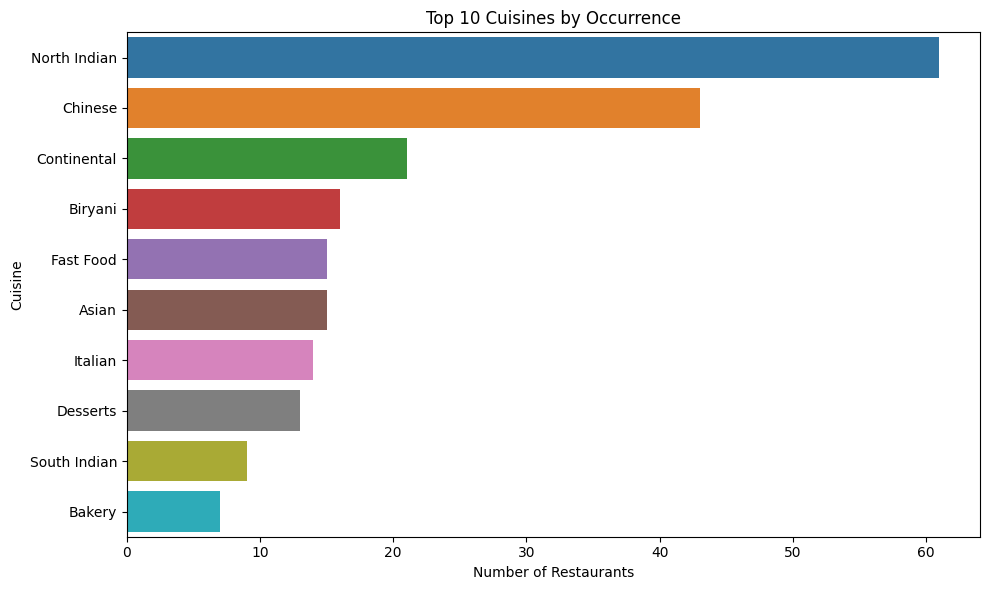

In [ ]:
# Plotting graph for top 10 cusines
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Restaurants', y='Cuisine', data=top10cuisine)
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.title('Top 10 Cuisines by Occurrence')
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

By utilizing the barplot visualization technique, I am able to present a clear and insightful view of the most sought-after cuisines, highlighting the culinary preferences that are in high demand among consumers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the graph, it is evident that North Indian, Chinese, and Continental cuisines are the most in-demand and widely available options in restaurants. These cuisines enjoy a significant presence and popularity among customers.

#### Chart - 4

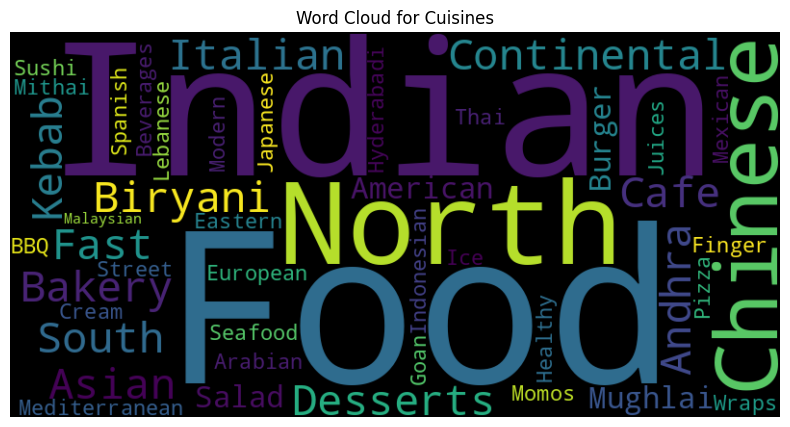

In [ ]:
# Chart - 4 visualization code
from wordcloud import WordCloud

# Storing all cuisines in the form of text
text = " ".join(name for name in cuisine_data.Cuisine)

# Creating the word cloud with text as an argument in .generate() method
word_cloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Cuisines")
plt.show()

##### 1. Why did you pick the specific chart?

imshow in the matplotlib library is used to visualize 2D data, such as images, heatmaps, and matrices. It's particularly useful for displaying images, creating heatmaps to highlight patterns in data, and visualizing scientific information like spectrograms or terrain elevation. This function is an effective tool for debugging, exploration, and creative data visualization.

##### 2. What is/are the insight(s) found from the chart?

Through the utilization of a word cloud, I was able to visually identify the most prevalent cuisines, showcasing the dominant culinary choices that are abundantly available across various restaurants.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The word cloud visualization prominently displays North Indian, Chinese, and Continental cuisines as the most prevalent and frequently offered options among various restaurants. Their larger appearance in the word cloud indicates their higher representation in the data.

#### Chart - 5

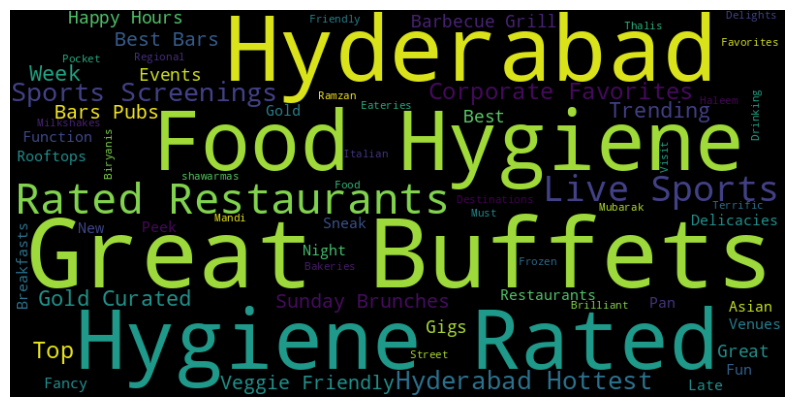

In [ ]:
# Chart - 5 visualization code
# Convert the 'Collections' column to string and remove NaN values
zomato_meta_data['Collections'] = zomato_meta_data['Collections'].astype(str).replace('nan', '')

# Storing all collections in the form of text
text = " ".join(name for name in zomato_meta_data.Collections)

# Creating the word cloud with text as an argument in .generate() method
word_cloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


##### 2. What is/are the insight(s) found from the chart?

By employing the word cloud visualization, I have effectively captured and represented the most frequently used tags, providing a visually striking depiction of the prevalent themes and topics that are widely utilized in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the gained insight Based on the word cloud graph, it is apparent that "Hyderabad," "food hygiene," and "rated restaurants" are the most commonly used tags employed by the restaurants. Their larger appearance in the word cloud highlights their significant prevalence and relevance in the datasets.

#### Chart - 6

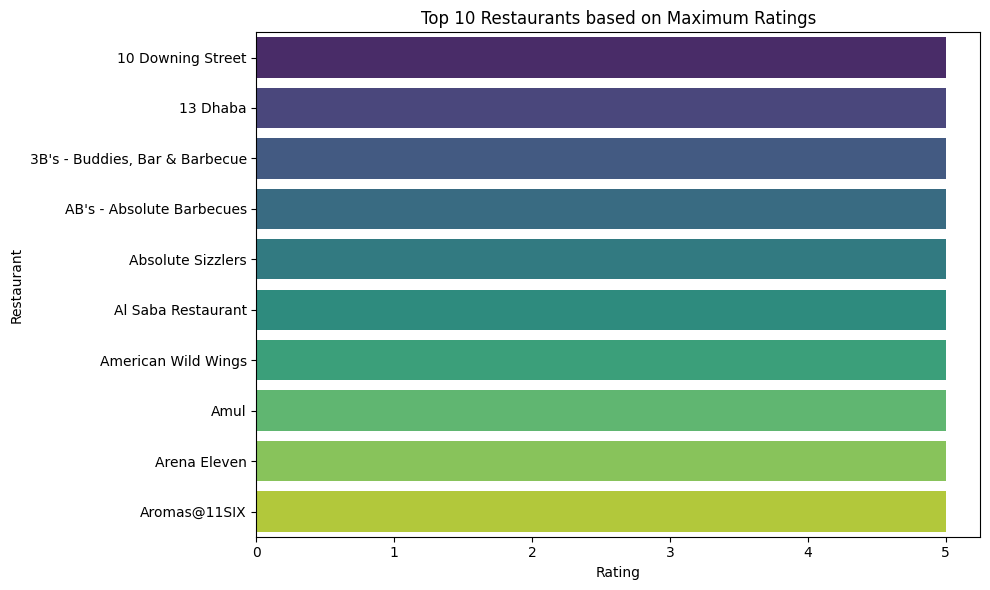

In [ ]:
# Chart - 6 visualization code for zomato_reviews datasets
top10_rated = zomato_reviews.groupby("Restaurant")["Rating"].max().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_rated.values, y=top10_rated.index, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Restaurant')
plt.title('Top 10 Restaurants based on Maximum Ratings')
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

By employing the barplot visualization, I have successfully identified and displayed the top-rated restaurants, offering a clear and concise view of the dining establishments that have received the highest accolades and positive feedback from customers. Among them, 10 Downing Street, 13 Dhaba, and Barbeque Nation emerge as the most highly rated choices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes , it will helps us to improve the quality of restaurent after getting feedback from customers.

#### Chart - 7

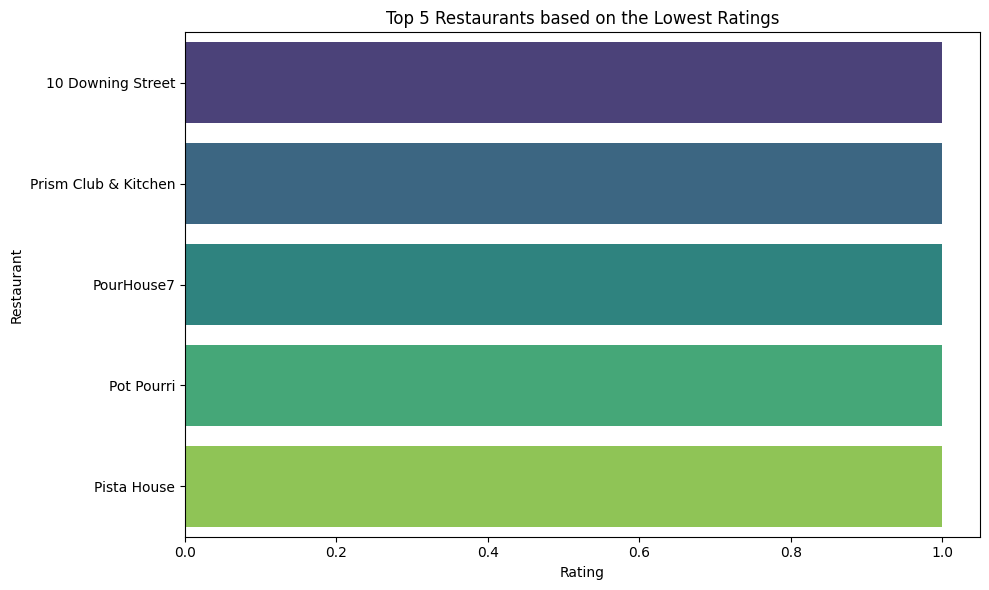

In [ ]:
# Chart - 7 visualization code
# Sort the restaurants based on their minimum ratings in ascending order
sorted_restaurants = zomato_reviews.groupby('Restaurant')['Rating'].min().sort_values()

# Select the top 5 restaurants with the lowest ratings
top5_least_rated = sorted_restaurants.nsmallest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top5_least_rated.values, y=top5_least_rated.index, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Restaurant')
plt.title('Top 5 Restaurants based on the Lowest Ratings')
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Using the bar plot visualization, I have investigated the least rated restaurants.

Based on the barplot analysis, it becomes apparent that 10 Downing Street, Prism Club Kitchen, and Pourhouse7 are among the least rated restaurants, indicating that these establishments have received comparatively lower customer ratings and feedback. This information highlights potential areas for improvement and further attention to enhance their overall dining experiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

lowest ratings restaurants helps us to find the problems behind the getting lower ratings.
so it will helps us to improve the ratings of the restaurants.

### Chart - 8

In [ ]:
# We will extrapolate the 15 profiles that have made more reviews.

# Groupby on the basis of rivewer gives the fequency of the reviews
reviewer_list = zomato_reviews.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')

 # Sorting the frequency of reviews decending
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)

# Selecting the top 15 reviewrs
top_reviewers = reviewer_list[:15]


Text(0, 0.5, 'N of reviews')

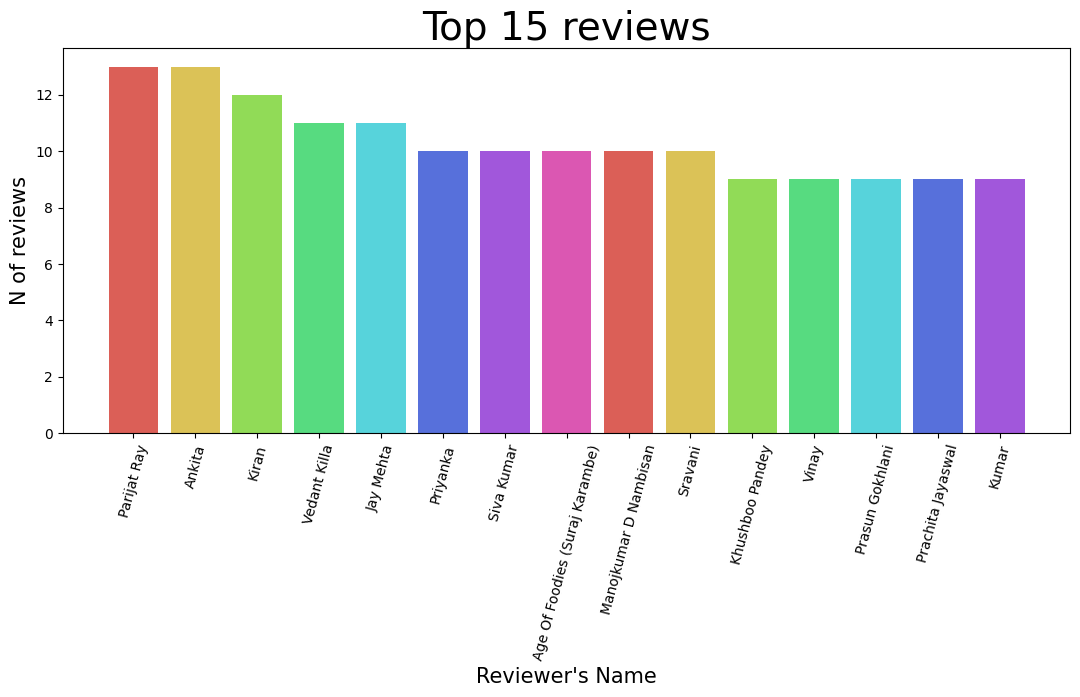

In [ ]:
# Visualizing the top 15 reviewers.
plt.figure(figsize=(13,5))
plt.bar(top_reviewers['Reviewer'], top_reviewers['Review_Count'], color = sns.color_palette("hls", 8))
plt.xticks(rotation=75)
plt.title('Top 15 reviews',size=28)
plt.xlabel("Reviewer's Name",size=15)
plt.ylabel('N of reviews',size=15)

We got the top 15 reviewers name in above visualisation chart.

#### Chart - 9

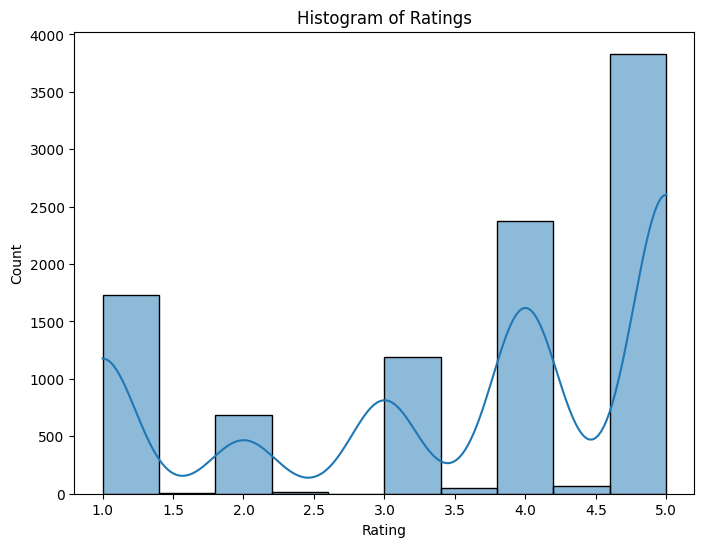

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(8, 6))
sns.histplot(data=zomato_reviews, x='Rating', bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Ratings')
plt.show()


##### 1. Why did you pick the specific chart?

histplot is used to create histograms, which visually show how data is distributed. It's helpful for understanding data patterns, finding outliers, comparing datasets, and making data-related decisions. It's a common tool in data analysis, visualization, and exploratory data analysis (EDA).

##### 2. What is/are the insight(s) found from the chart?

By utilizing the histogram visualization, I am able to identify the most frequently assigned rating scores, offering valuable insights into the preferred or common rating categories given by customers to various restaurants.

As per the histogram analysis of the dataset, it is evident that the majority of customers have given a 5-star rating to the restaurants. This indicates that a significant number of diners have had highly satisfactory experiences, leading to the prevalence of 5-star ratings as the most common rating category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Rating helps us to know the problems bheind the restaurant lower rating and it will helps us to improve the rating of the restaurants with the helps of restaurent reviews.

#### Chart - 10

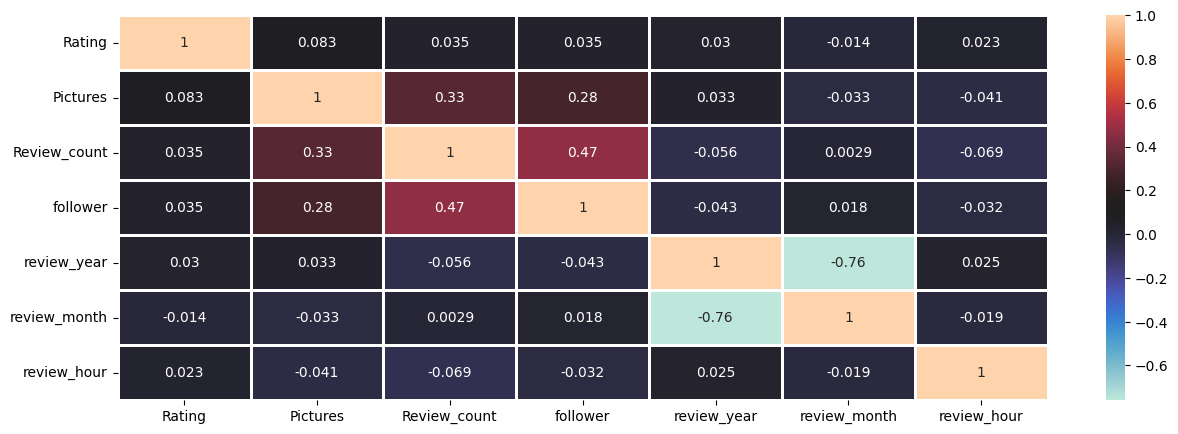

In [ ]:
# Chart - 10 visualization code
f, ax = plt.subplots(figsize = (15, 5))
sns.heatmap(zomato_reviews.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are used to visually represent data patterns and relationships in a 2D format. They help identify trends, correlations, and data density. Heatmaps are intuitive for decision-making, comparing variables, and conveying insights. They find applications in fields like data analysis, science, user experience, and more.

##### 2. What is/are the insight(s) found from the chart?

in the above heatmap graph we see that the correlation between variables like review_year are negatively corelated with review month. and follower and reveiw_count are positively correlated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes , it will helps us to know the corelation and with the help of heatmap graph.it help to drive the price range of restaurant.

#### Chart - 11 - Pair Plot

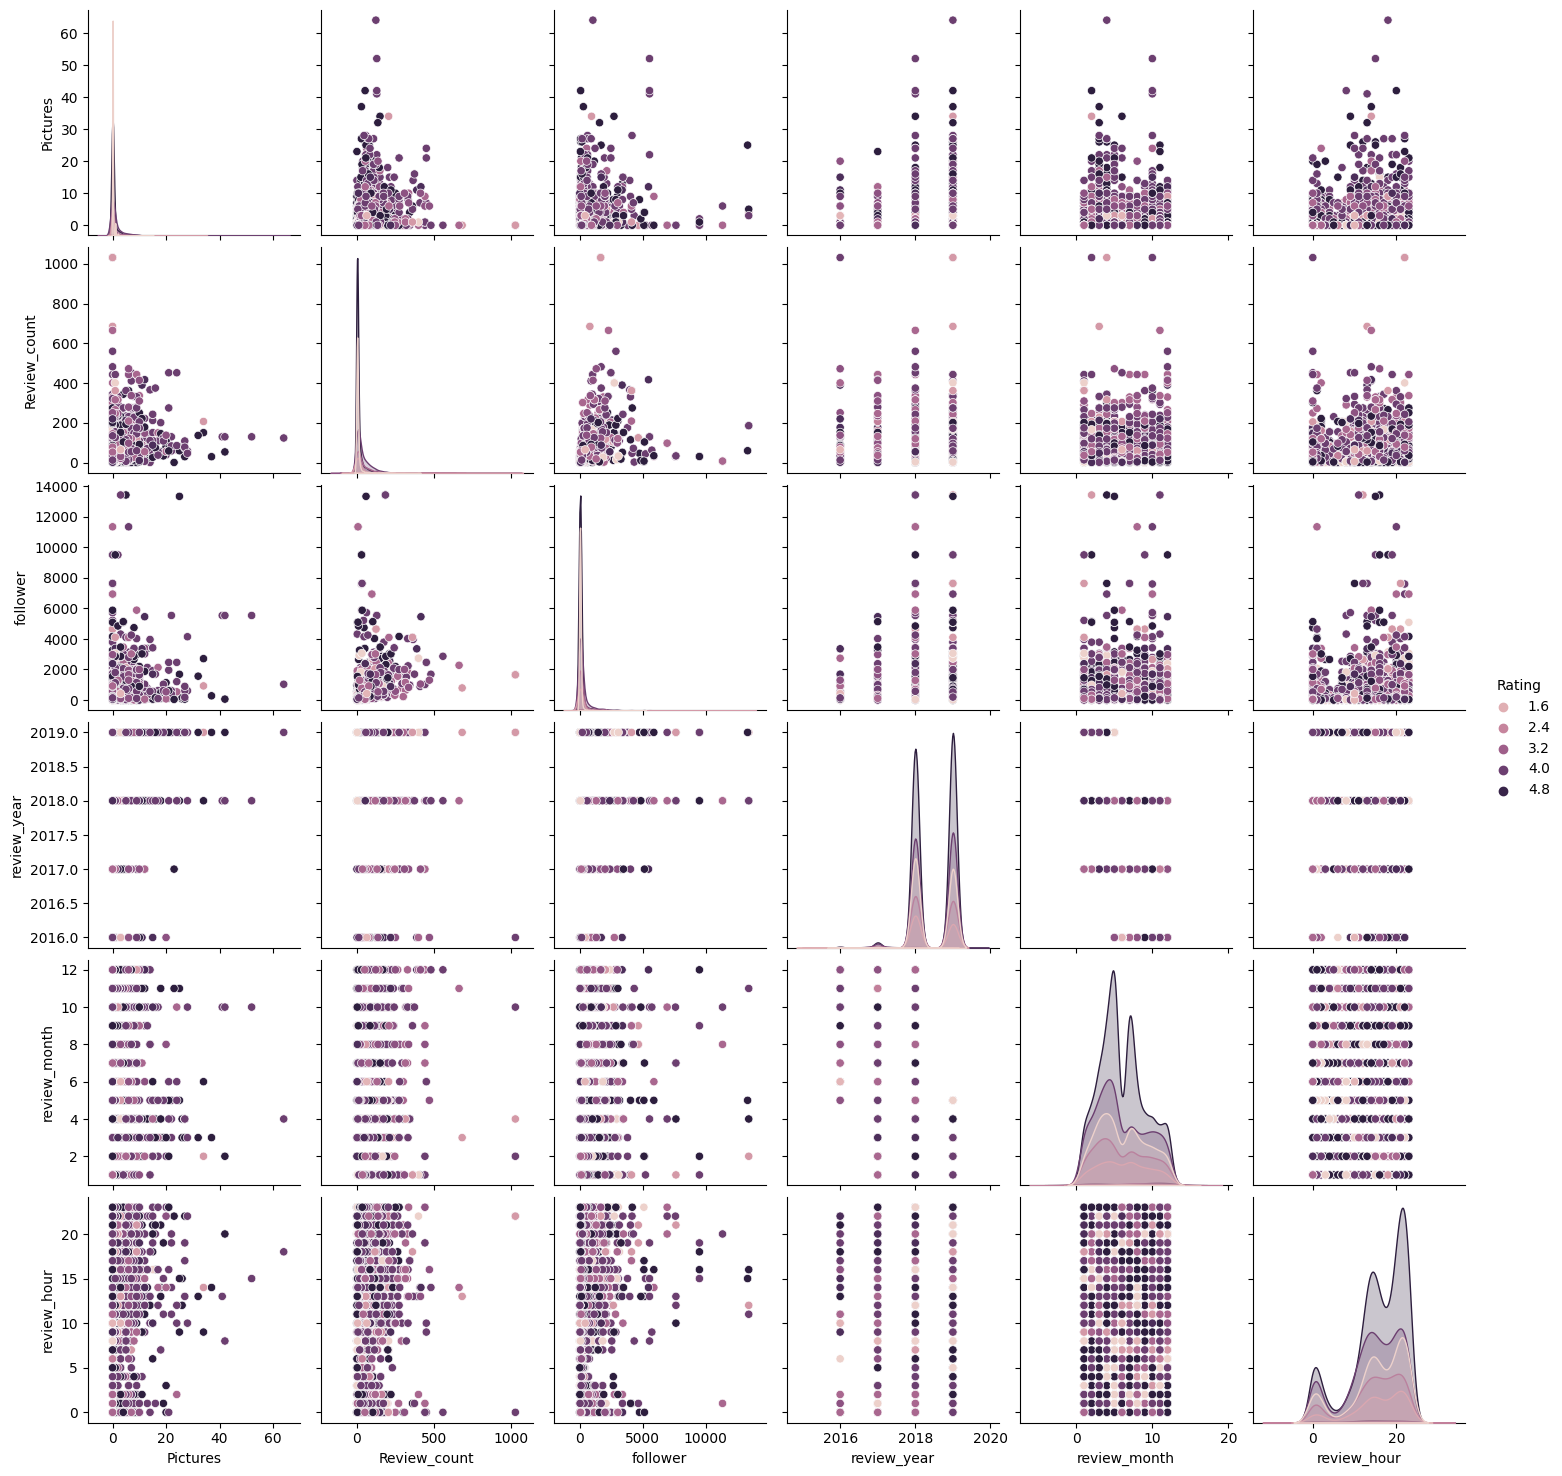

In [ ]:
# Pair Plot allows us to plot pairwise relationships between variables within a dataset.
sns.pairplot(data=zomato_reviews,hue='Rating')

##### 1. Why did you pick the specific chart?

A pair plot is used to visualize relationships and patterns between pairs of variables in a dataset. It's valuable for quickly identifying correlations, trends, and outliers. By displaying scatterplots and histograms, pair plots offer insights into how variables relate and are distributed, aiding data exploration and initial analysis.

##### 2. What is/are the insight(s) found from the chart?

we found that rating according to review_hour,review_month,review_year,follower,review_count and picture.

## ***5. Feature Engineering & Data Pre-processing***

## 1.Removing Duplicates

In [ ]:
#  romoving duplicates values from zomatos_reviews datasets
zomato_reviews = zomato_reviews.drop_duplicates()

####   Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# renaming restaurant column name in zomato_meta_meta
zomato_meta_data = zomato_meta_data.rename(columns={'Name':'Restaurant'})

In [ ]:
# Mearging zomato_review and restraunt_meta_data
merged_df =zomato_meta_data.merge(zomato_reviews, on='Restaurant')

In [ ]:
#Checking Null Values
merged_df.isnull().sum()

Restaurant        0
Links             0
Cost              0
Collections       0
Cuisines          0
Timings         100
Reviewer          2
Review            9
Rating            2
Metadata          2
Time              2
Pictures          0
Review_count      2
follower          0
review_year       2
review_month      2
review_hour       2
dtype: int64

In [ ]:
# Checking Rows and column
merged_df.shape

(9964, 17)

In [ ]:
#  Checking null values in timings columns
merged_df.loc[merged_df['Timings'].isnull()]

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_count,follower,review_year,review_month,review_hour
3000,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Binnani,I had bad experience here with Masala Papad. I...,3.0,2 Reviews,2019-05-25 14:43:00,0,2.0,0,2019.0,5.0,14.0
3001,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Sravani,Nice ambiance....different and delicious food....,5.0,"10 Reviews , 10 Followers",2019-05-22 13:56:00,1,10.0,10,2019.0,5.0,13.0
3002,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Arunraj R,Affordable good food. I would have given a 5 s...,4.0,"10 Reviews , 64 Followers",2019-05-21 23:12:00,0,10.0,64,2019.0,5.0,23.0
3003,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Asha Tejaswini,I had the worst experience with the food and t...,1.0,"14 Reviews , 10 Followers",2019-05-17 20:36:00,0,14.0,10,2019.0,5.0,20.0
3004,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Chandrasekhar Dasika,"*IF YOU ARE READING THIS, AND SITLL GOING TO T...",1.0,"5 Reviews , 29 Followers",2019-05-13 12:48:00,0,5.0,29,2019.0,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Rakesh Bandiwar,Amazing place to have south Indian cuisine.\nG...,4.0,"44 Reviews , 5210 Followers",2019-01-17 15:01:00,0,44.0,5210,2019.0,1.0,15.0
3096,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Aishwariya Kawaii,Our usual hangout place. Every time we think o...,5.0,"10 Reviews , 1 Follower",2019-01-14 16:43:00,0,10.0,1,2019.0,1.0,16.0
3097,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Saketh Goundagouni,I was there with my friends yesterday for dinn...,4.0,"4 Reviews , 2 Followers",2019-01-11 10:37:00,0,4.0,2,2019.0,1.0,10.0
3098,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,,"Andhra, South Indian, North Indian",NaN,Tasty Hyderabad,This place was in my bucket list since a very ...,3.0,"75 Reviews , 174 Followers",2019-01-10 17:51:00,9,75.0,174,2019.0,1.0,17.0


In [ ]:
# filling null value in timings columns with mode values
merged_df.Timings.fillna(merged_df.Timings.mode()[0],inplace=True)

In [ ]:
#  droping nan columns in columns review,reviews_count
merged_df.dropna(subset=['Review','Review_count'],inplace=True)

In [ ]:
# After  Dropping nan values checking for null values
merged_df.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections     0
Cuisines        0
Timings         0
Reviewer        0
Review          0
Rating          0
Metadata        0
Time            0
Pictures        0
Review_count    0
follower        0
review_year     0
review_month    0
review_hour     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

we found that in timing columns there is hundred of rows with null values. so there we fill na value with mode values of the timings columns.after that we drop nan values in reviews and reviews count columns . and finally we see that is not any null values found in merged_df datasets.

### 2. Handling Outliers

In [ ]:
# Defining a function for calcualting outliers-
def calculate_outlier(df, column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] > upper) | (df[column] < lower)]
    percent_outliers = round((outliers.shape[0] / df.shape[0]) * 100, 2)
    return lower, upper, percent_outliers

In [ ]:
#  calculating outlier for merged_df
lower_cost, upper_cost, percentage_cost_outliers=calculate_outlier(merged_df, "Cost")
print("lower band",(lower_cost))
print("upper band",(upper_cost))
print("outlier percent",(percentage_cost_outliers))

lower band -550.0
upper band 2250.0
outlier percent 2.01


In [ ]:
#  Assining cost t0 2250 which is greater than 2250
merged_df.loc[merged_df['Cost']> upper_cost,'Cost'] = 2250

In [ ]:
#  follower outlier check
lower_count, upper_count, followers_percentage_outliers=calculate_outlier(merged_df, "follower")
print("lower band",(lower_count))
print("upper band",(upper_count))
print("follower outlier percent",(followers_percentage_outliers))

lower band -92.0
upper band 156.0
follower outlier percent 15.85


In [ ]:
# assigning follower to 156 for greater than 156 in follower
merged_df.loc[merged_df['follower'] > upper_count, 'follower'] = 156

##### What all outlier treatment techniques have you used and why did you use those techniques?

i have checked the outlier and found two band upper and lower band then i have assined the upper band values to all the outlier which is greater than upper band values.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
#  looking at the review column head
merged_df.Review.head(8)

0    The ambience was good, food was quite good . h...
1    Ambience is too good for a pleasant evening. S...
2    A must try.. great food great ambience. Thnx f...
3    Soumen das and Arun was a great guy. Only beca...
4    Food is good.we ordered Kodi drumsticks and ba...
5    Ambiance is good, service is good, food is aPr...
6    Its a very nice place, ambience is different, ...
7    Well after reading so many reviews finally vis...
Name: Review, dtype: object

In [ ]:
# Expand Contraction used to improve text understanding and processing and it also combine two word into one.
!pip install contractions
import contractions
#  making function for expand_text
def expand_contractions(text):
  expand_text = contractions.fix(text)
  return expand_text


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.7 MB/s eta 0:00:00


In [ ]:
# Applying contractions in merged_df to Review columns
merged_df['Review'] = merged_df['Review'].apply(expand_contractions)

#### 2. Lower Casing

In [ ]:
# Lower Casing for converting all upper case word to lower case
def to_lower(text):
    lower_text=text.lower()
    return lower_text

In [ ]:
#  applying to_lower function in merged_df to review column
merged_df["Review"] = merged_df["Review"].apply(to_lower)

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
#  makiing function for removing punchuation .
import re
import unicodedata

def remove_punch(text):
  normalized_text = unicodedata.normalize('NFKD',text).encode('ASCII', 'ignore').decode('utf-8')
  # Removeing punctuation characters from the text, except for alphabets and numbers
  punch_text = re.sub('[^a-zA-Z0-9]', ' ', normalized_text)
  return punch_text

In [ ]:
#  Applying remove_punch function to review column in merged_df
merged_df['Review'] = merged_df['Review'].apply(remove_punch)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_url(text):
  # Convert the input to a string if it's not already
  text = str(text)
#  removing using regular expression
  url_pattern = r'http\S+|www\S+'
  non_url_text = re.sub(url_pattern, '', text)
  return non_url_text

In [ ]:
#  Applying remove_url function to review column in merged_df
merged_df["Review"] = merged_df["Review"].apply(remove_url)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
#  to remove insignificant words from a data set with which you work
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
  # Tokenize the text into individual words
  words = text.split()
  #  removing stopword from list
  stopwords_list = set(stopwords.words('english'))
  words = [i for i in words if i.lower() not in stopwords_list]

  #  join remaining words back into single strings
  cleaned_text  = ' '.join(words)
  return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#  Applying remove_stopwords function to review columns in merged_df
merged_df["Review"] = merged_df["Review"].apply(remove_stopwords)

#### 6. Rephrase Text - Not Applied

#### 7. Tokenization

In [ ]:
# Tokenization to split paragraphs and sentences into smaller units that can be more easily assigned meaning
def word_token(text):
  tokens = nltk.word_tokenize(text)
  return tokens

In [ ]:
#  Applying word_token function in merged_df to review column
merged_df['Review'] = merged_df['Review'].apply(word_token)

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
"""Normalization is helpful in reducing the number of unique tokens present in the text, removing the variations in a text.
and also cleaning the text by removing redundant information. Two popular methods used for normalization are stemming and lemmatization"""
from nltk.stem import PorterStemmer

def stem_words(text):
    stemmer=PorterStemmer()
    stemmed_words=[stemmer.stem(words) for words in text]
    return stemmed_words

In [ ]:
# Applying stem_word function to review column in merged_df
merged_df["Review"] = merged_df["Review"].apply(stem_words)

##### Which text normalization technique have you used and why?

Porter Stemmer, and it is used in natural language processing to simplify words by reducing them to their base or root forms. It helps with text normalization, reducing vocabulary size, and improving token matching in search and text analysis tasks. However, it may not always produce perfect results, and the choice of stemming or other text preprocessing methods depends on the specific NLP task.

## Sentiment Analysis

In [ ]:
#Sentiment lexicona simple rule-based model for sentiment analysis.
#It can efficiently handle vocabularies, abbreviations, capitalizations, repeated punctuations, emoticons.
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Initialize Vender SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score for each review
def get_sentiment_score(review):
    review = ' '.join(review) # Convert list of words back to a sentence
    return sia.polarity_scores(review)['compound']

# Apply the sentiment analysis function to the 'Review' column
merged_df['Vader_Sentiment'] = merged_df["Review"].apply(get_sentiment_score)


In [ ]:
# Initialize SentiWordNet
from nltk.corpus import sentiwordnet as swn
nltk.download('wordnet')

from nltk.corpus import wordnet


nltk.download('sentiwordnet')

def get_sentiwordnet_sentiment(review):
    sentiment_score = 0
    for word in review:
        synsets = list(swn.senti_synsets(word))
        if synsets:
            sentiment_score += synsets[0].pos_score() - synsets[0].neg_score()
    return sentiment_score

merged_df["SentiWordNet_Sentiment"] = merged_df["Review"].apply(get_sentiwordnet_sentiment)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


In [ ]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=8e7f871e0a9e82df4b8a12efd527c64b992106d72c2fa76bc74fa1711814cfb2
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
# Initialize Affinn Sentiment and it is the simplest yet popular lexicons used for sentiment analysis
from afinn import Afinn

afinn = Afinn()

def get_afinn_sentiment(review):
    return afinn.score(' '.join(review))

merged_df["AFINN_Sentiment"] = merged_df["Review"].apply(get_afinn_sentiment)


In [ ]:
# Initialize Bing_Liu_Sentiment Lexicon
from nltk.corpus import opinion_lexicon

nltk.download('opinion_lexicon')

def get_bing_liu_sentiment(review):
    positive_words = set(opinion_lexicon.positive())
    negative_words = set(opinion_lexicon.negative())
    sentiment_score = sum(1 for word in review if word in positive_words) - sum(1 for word in review if word in negative_words)
    return sentiment_score

merged_df["Bing_Liu_Sentiment"] = merged_df["Review"].apply(get_bing_liu_sentiment)

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


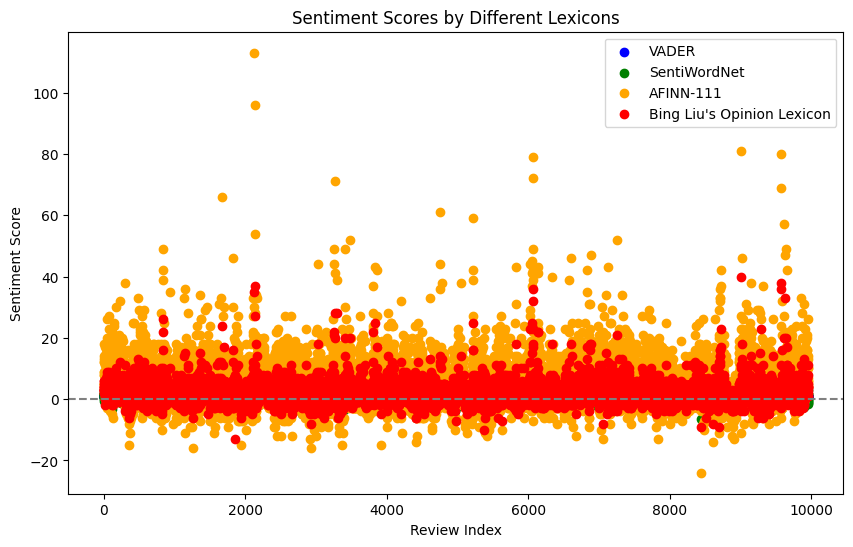

In [ ]:
# Visualizing All Sentiment Lexicon Methods

plt.figure(figsize=(10, 6))
plt.scatter(range(len(merged_df)), merged_df['Vader_Sentiment'], color='blue', label='VADER')
plt.scatter(range(len(merged_df)), merged_df['SentiWordNet_Sentiment'], color='green', label='SentiWordNet')
plt.scatter(range(len(merged_df)), merged_df['AFINN_Sentiment'], color='orange', label='AFINN-111')
plt.scatter(range(len(merged_df)), merged_df['Bing_Liu_Sentiment'], color='red', label="Bing Liu's Opinion Lexicon")

plt.axhline(y=0, color='gray', linestyle='--')  # Add a horizontal line at sentiment score = 0 (neutral)

plt.xlabel('Review Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by Different Lexicons')
plt.legend()
plt.show()

Through the application of a scatter plot visualization, I have effectively analyzed and compared the performance of different sentiment lexicons. This technique allows me to discern which lexicon demonstrates superior efficacy in capturing and interpreting sentiments from the data.

Upon meticulous examination of the scatter plot, it becomes evident that the Affin-111 and Bing_Liu_Sentiment lexicons exhibit notably superior accuracy and performance in capturing sentiments from the data. These lexicons prove to be more reliable and effective in interpreting the emotional content present in the analyzed text

In [ ]:
# Creaing a new DataFrame for Sentiment Analysis

sentimental_df=merged_df[["Restaurant", "Review", "Vader_Sentiment", "SentiWordNet_Sentiment", "AFINN_Sentiment", "Bing_Liu_Sentiment"]]

In [ ]:
# Define a function to map sentiment scores to labels
def sentiment_label(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

In [ ]:
# Create the new column "Overall_Sentiment" based on the sentiment scores
sentimental_df["Overall_Sentiment"] =sentimental_df.mean(axis=1).apply(sentiment_label)

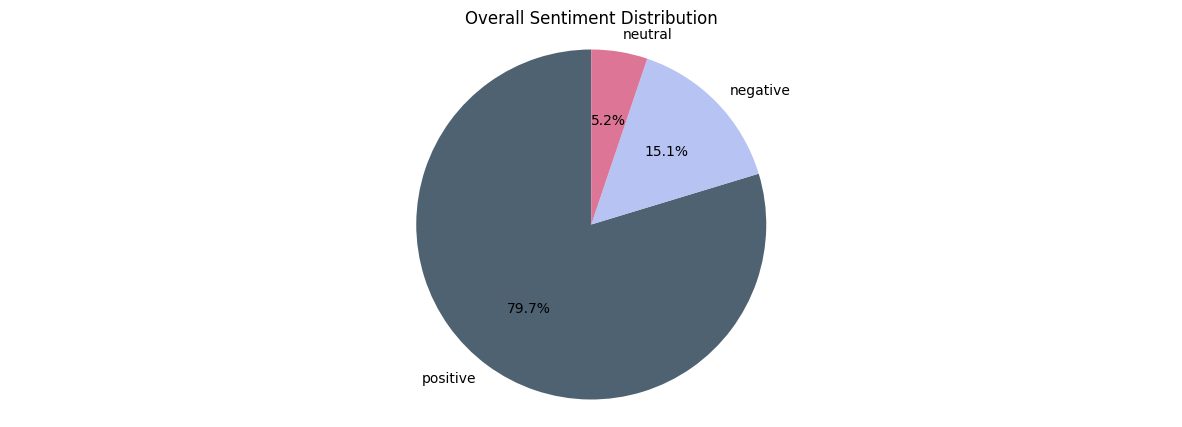

In [ ]:
sentiment_counts = sentimental_df["Overall_Sentiment"].value_counts()

# Create a pie chart to visualize the sentiment distribution
plt.figure(figsize=(15, 5))
colors = ['#4F6272', '#B7C3F3', '#DD7596']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Overall Sentiment Distribution")
plt.show()

# Clustering

### Textual Data Preprocessing

In [ ]:
# null value count for zomatao_meta_data
zomato_meta_data.isnull().sum()

Restaurant     0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        1
dtype: int64

In [ ]:
# Creating new dataset for clustering
cluster_df=zomato_meta_data[["Cost", "Cuisines"]]

In [ ]:
# making a copy of cluster df
cluster_data=cluster_df.copy()

In [ ]:
# top 5 rows of clsterdf
cluster_df.head()

,Cost,Cuisines
0,800,"Chinese, Continental, Kebab, European, South I..."
1,800,"Biryani, North Indian, Chinese"
2,1300,"Asian, Mediterranean, North Indian, Desserts"
3,800,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,1200,"Asian, Continental, North Indian, Chinese, Med..."


#### 1. Expand Contraction

In [ ]:
# Applying  expand contractions to improve text understanding and processing.
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(expand_contractions)

In [ ]:
# 2. Lower Casing
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(to_lower)

In [ ]:
### Removing spaces which are separated by commas

def remove_spaces_between_names(text):
    # Split the text by commas
    names = text.split(',')

    # Remove spaces between individual names
    cleaned_names = [name.strip().replace(' ', '') for name in names]

    # Join the cleaned names with commas
    cleaned_text = ', '.join(cleaned_names)

    return cleaned_text

In [ ]:
# Applying function remove spacess between names
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(remove_spaces_between_names)

In [ ]:
# 3. Removing Punctuations
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(remove_punch)

In [ ]:
# 4. Removing URLs & Removing words and digits contain digits.
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(remove_url)

In [ ]:
# 5. Removing Stopwords
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(remove_stopwords)

In [ ]:
# Tokenization
cluster_df["Cuisines"] = cluster_df["Cuisines"].apply(word_token)

In [ ]:
#  top 5 rows of cuisines columns
cluster_df.Cuisines.head()

0    [chinese, continental, kebab, european, southi...
1                      [biryani, northindian, chinese]
2        [asian, mediterranean, northindian, desserts]
3    [biryani, northindian, chinese, seafood, bever...
4    [asian, continental, northindian, chinese, med...
Name: Cuisines, dtype: object

In [ ]:
#  Joining all cuisines
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda cuisines: ' '.join(cuisines))

In [ ]:
#  fitting countvectorizer to cluster_df column cuisines
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
cluster_dff = vectorizer.fit_transform(cluster_df["Cuisines"])

In [ ]:
cluster_dff

<105x44 sparse matrix of type '<class 'numpy.int64'>'
	with 313 stored elements in Compressed Sparse Row format>

In [ ]:
# concating cost column and cluster_dff
features = pd.concat([cluster_df['Cost'], pd.DataFrame(cluster_dff.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

In [ ]:
features.head()

,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,800,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,800,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1300,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,800,0,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
4,1200,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#  selecting x features
X = features[["Cost"]].values

In [ ]:
# fitting scaler to features cost
features["Cost"] = scaler.fit_transform(X)

In [ ]:
# head for features
features.head()

,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,0.245283,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0.245283,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0.433962,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.245283,0,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
4,0.396226,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## ***6. ML Model Implementation***

### ML Model - 1

### K_Means Algorithm

In [ ]:
# ML Model - 1 K-means Implementation
from sklearn.cluster import KMeans

# Number of clusters you want to create
n_clusters = 3

# Create an instance of the KMeans clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)


# Fit the Algorithm
kmeans.fit(features)

# Get the cluster labels for each data point
features["Kmean_ClusterLabel"] = kmeans.labels_

#### 2. Cross- Validation & Hyperparameter Tuning

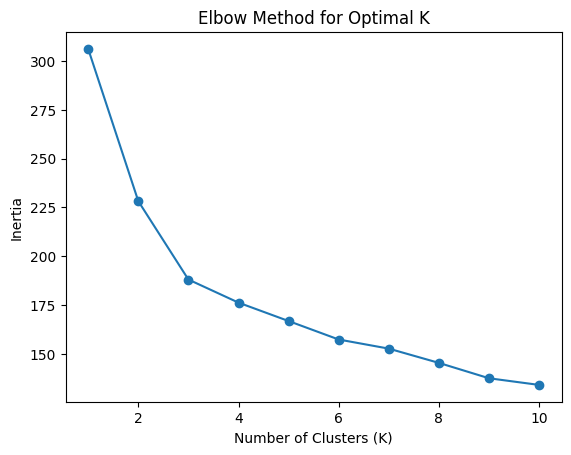

In [ ]:
# ML Model - 1
## K-Means Algorithm
### Check the optimum value of Cluster Using Elbow Method

from sklearn.cluster import KMeans

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Here, the elbow point is 3.So, we have choose correct value of n_cluster.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

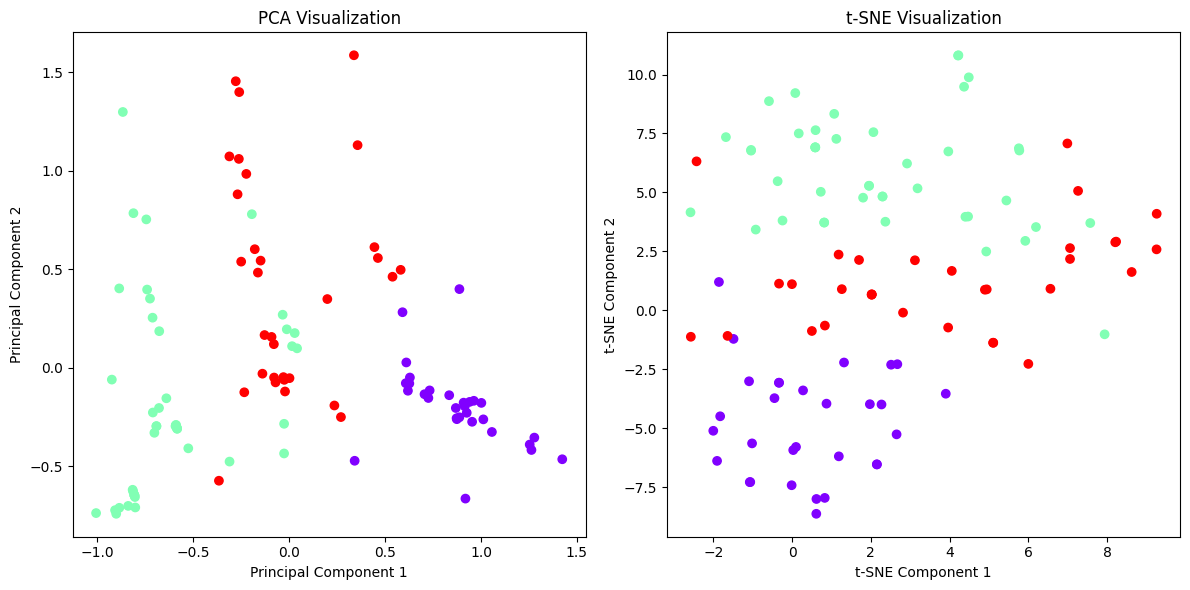

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing the Cluster using PCA and t-sne

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Features1 = features.drop(columns=["Kmean_ClusterLabel"])
cluster_labels = features["Kmean_ClusterLabel"]

#Reduce the dimensionality using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Features1)

# Reduce the dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(Features1)

# Create subplots to visualize PCA and t-SNE results side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot PCA
axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap="rainbow")
axes[0].set_title("PCA Visualization")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")

# Plot t-SNE
axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap="rainbow")
axes[1].set_title("t-SNE Visualization")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")

plt.tight_layout()
plt.show()


### ML Model - 2

### AgglomerativeClustering

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Determining Cosine-Similarity
cosine_sim = cosine_similarity(features.iloc[:,:-1])

In [ ]:
# Implementing the Agglomertive Algorithm
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
agg_clustering.fit(1 - cosine_sim)

AgglomerativeClustering(affinity='precomputed', linkage='complete',
                        n_clusters=3)

In [ ]:
# Creating Label in dataset
features["Agg_Cluster_Label"] = agg_clustering.labels_

In [ ]:
features.head()

,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,...,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Kmean_ClusterLabel,Agg_Cluster_Label
0,0.245283,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.245283,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.433962,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
3,0.245283,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0.396226,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

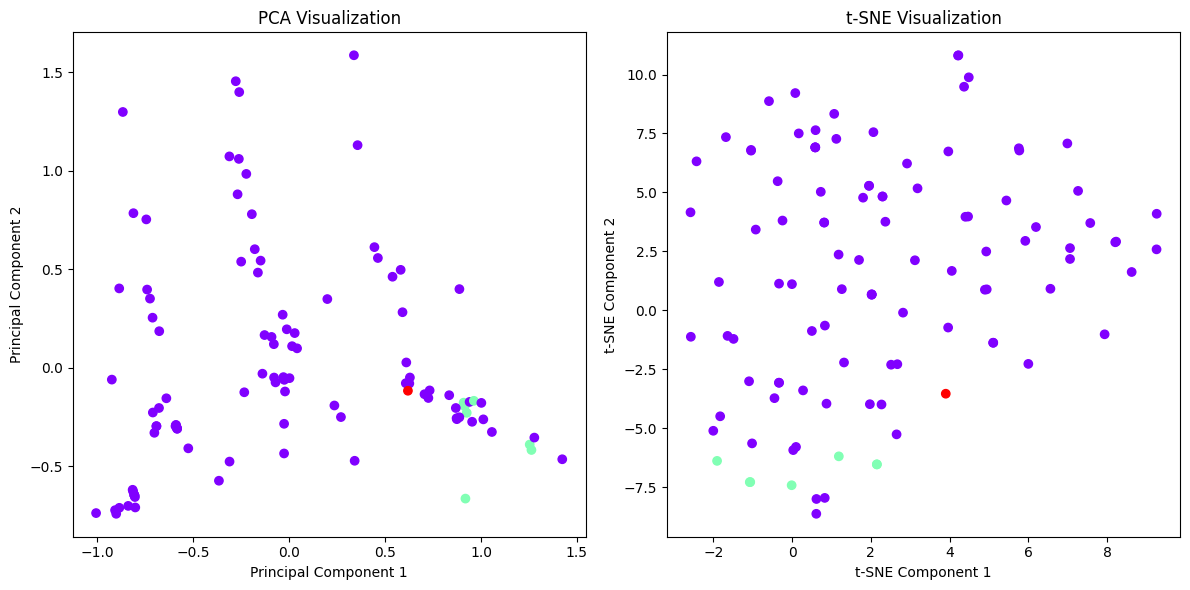

In [ ]:
# Visualizing Cluster for Agglomerative Clustering Algorithm

Features2 = features.drop(columns=["Agg_Cluster_Label", "Kmean_ClusterLabel"])
cluster_labels = features["Agg_Cluster_Label"]

# Reduce the dimensionality using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Features2)

# Reduce the dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(Features2)

# Visualizing PCA and t-SNE results side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot PCA
axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap="rainbow")
axes[0].set_title("PCA Visualization")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")

# Plot t-SNE
axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap="rainbow")
axes[1].set_title("t-SNE Visualization")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")

plt.tight_layout()
plt.show()

In [ ]:
# Cluters

# Group the data by the cluster labels
cluster_groups = features.groupby('Kmean_ClusterLabel')

# Iterate through each cluster and analyze the characteristics
for cluster_label, cluster_data in cluster_groups:
    print(f"Cluster {cluster_label}:")

    # Drop the unwanted columns before analyzing the cuisines
    cluster_data = cluster_data.drop(['Kmean_ClusterLabel', 'Agg_Cluster_Label'], axis=1)

    # Calculate the most frequent cuisines in the cluster
    most_frequent_cuisines = cluster_data.drop('Cost', axis=1).sum().nlargest(5)
    print("Most frequent cuisines:")
    print(most_frequent_cuisines)

    # Calculate the cost range in the cluster
    cost_range = (cluster_data['Cost'].min(), cluster_data['Cost'].max())
    print(f"Cost range: {cost_range[0]} - {cost_range[1]}")

    print("-------------------------------------")


Cluster 0:
Most frequent cuisines:
desserts    12
fastfood    12
bakery       6
cafe         6
american     4
dtype: int64
Cost range: 0.0 - 0.5471698113207547
-------------------------------------
Cluster 1:
Most frequent cuisines:
chinese        43
northindian    35
biryani        13
continental     9
asian           6
dtype: int64
Cost range: 0.09433962264150944 - 1.0
-------------------------------------
Cluster 2:
Most frequent cuisines:
northindian      26
continental      11
italian           9
asian             8
mediterranean     4
dtype: int64
Cost range: 0.09433962264150944 - 0.8867924528301886
-------------------------------------


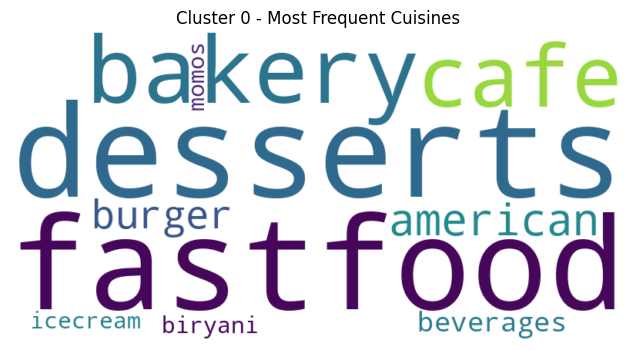

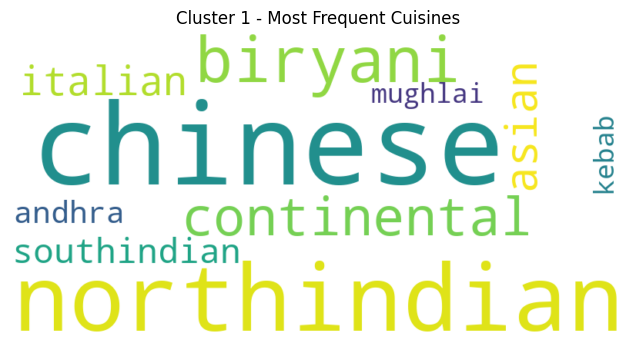

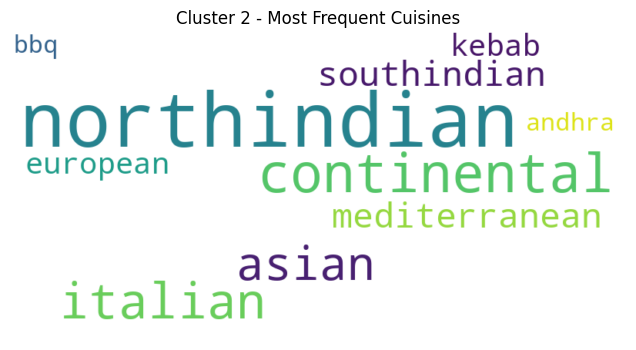

In [ ]:
#Visulaizing all three cluster by wrodcloud

# Group the data by the cluster labels
cluster_groups = features.groupby('Kmean_ClusterLabel')

# Iterate through each cluster and create a word cloud for the most frequent cuisines
for cluster_label, cluster_data in cluster_groups:
    # Drop the unwanted columns before analyzing the cuisines
    cluster_data = cluster_data.drop(['Kmean_ClusterLabel', 'Agg_Cluster_Label'], axis=1)

    # Calculate the most frequent cuisines in the cluster
    most_frequent_cuisines = cluster_data.drop('Cost', axis=1).sum().nlargest(10)

    # Convert the most frequent cuisines into a dictionary format (word: frequency)
    cuisines_dict = most_frequent_cuisines.to_dict()

    # Create a word cloud for the cluster
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cuisines_dict)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {cluster_label} - Most Frequent Cuisines")
    plt.axis('off')
    plt.show()


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully accomplished the objectives of clustering restaurants based on their features and conducting sentiment analysis on user reviews. Through clustering, we gained valuable insights into the grouping of restaurants, helping both users and businesses make informed decisions. The sentiment analysis allowed us to understand the sentiments expressed by users in their reviews, providing businesses with valuable feedback to enhance their services and improve the overall user experience.

The utilization of various data preprocessing techniques, such as text vectorization and feature normalization, played a crucial role in preparing the data for clustering and sentiment analysis. We employed popular machine learning algorithms, including K-Means and Agglomerative Clustering, to create meaningful clusters of restaurants based on their similarities.

For future enhancements, more advanced clustering algorithms and sentiment analysis techniques could be explored to further refine the results. Additionally, incorporating additional features such as images and menus of the restaurants might provide more comprehensive insights.

Overall, this project demonstrates the potential of leveraging data analytics to gain valuable insights into the restaurant industry, aiding both users in making informed choices and businesses in enhancing their services to meet customer expectations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***